<a href="https://colab.research.google.com/github/Johnvasc/CLASSIFICA-O-UNI-E-MULTIRR-TULO-DE-SENTIMENTOS-EM-TEXTOS-CURTOS/blob/main/Codigos/unirrotulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import spacy
!python -m spacy download pt_core_news_sm
nlp = spacy.load("pt_core_news_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
dataset = pd.read_excel('caminho do dataset')
dataset_sintetico = pd.read_excel('caminho do dataset sintético')

In [ ]:
# Remover os comentários caso queira fazer a classificação excluindo comentários neutros
# dataset_sintetico = dataset_sintetico[dataset_sintetico['Emoção 1'] != 'neutro']
# dataset = dataset[dataset['Emoção 1'] != 'neutro']

# Gráficos


## View

In [ ]:
dataset

,Comentário,Emoção 1,Emoção 2,Aspecto
0,"Deus o fará pagar por isto, não tenham dúvidas...",raiva,-,negativo
4,"O pior que é funcionário chinês, os cara prefe...",raiva,felicidade,negativo
5,Tem também o vídeo do Paulo Guedes dizendo que...,raiva,-,negativo
6,"Todo dia sai um otario e um malandro na rua, s...",raiva,-,negativo
7,O Brasil vai lançar seu foguete \nCuba também ...,raiva,-,negativo
...,...,...,...,...
2203,"Comemos um artesanal maravilhoso ontem, noite ...",felicidade,-,positivo
2204,obrigada deus eita mds morri,felicidade,surpresa,positivo
2205,"Que legal, um detalhe com curiosidade :D \nAli...",felicidade,surpresa,positivo
2206,Ache o que quiser \nO que não dá é pro cara po...,raiva,-,negativo


from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Emoção 1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Emoção 2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Aspecto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Emoção 2'].value_counts()
    for x_label, grp in dataset.groupby('Emoção 1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Emoção 1')
_ = plt.ylabel('Emoção 2')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Aspecto'].value_counts()
    for x_label, grp in dataset.groupby('Emoção 2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Emoção 2')
_ = plt.ylabel('Aspecto')

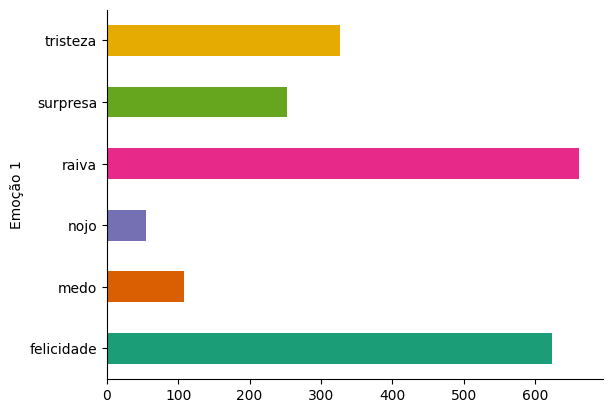

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Emoção 1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dataset_sintetico

,Comentário,Emoção 1,Emoção 2,Plataforma,Aspecto
0,"Ahhh, finalmente consegui! A sensação de alívi...",felicidade,-,ChatGPT 4.0,positivo
1,Não acredito que isso aconteceu... De novo?! Q...,surpresa,tristeza,ChatGPT 4.0,negativo
2,"Tô rindo pra não chorar kkkkkk, que mistura de...",tristeza,felicidade,ChatGPT 4.0,negativo
3,"OMG, que fofuraaaa! Meu coração tá explodindo ...",felicidade,-,ChatGPT 4.0,positivo
4,"Ok, calma. Respira fundo... Raiva + ansiedade ...",raiva,-,ChatGPT 4.0,negativo
...,...,...,...,...,...
1664,Abrir a geladeira e levar um tapa na cara com ...,nojo,-,Deepseek,negativo
1665,Ver a pessoa na sua frente no mercado lambendo...,nojo,-,Deepseek,negativo
1666,Quando você pisa descalço em algo quentinho e ...,nojo,-,Deepseek,negativo
1667,Descobrir que aquela 'mancha de café' no tecla...,nojo,-,Deepseek,negativo


from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Emoção 1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

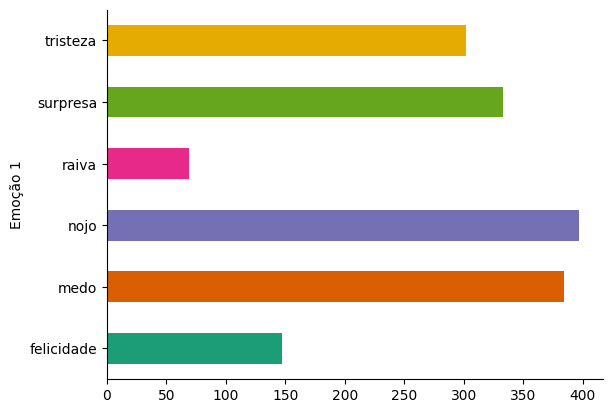

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
dataset_sintetico.groupby('Emoção 1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Números

In [ ]:
# Contagem de exemplos por emoção no dataset original
emocao1_counts = dataset['Emoção 1'].value_counts()
print("Contagem de emoções no dataset original:")
print(emocao1_counts)

# Contagem de exemplos por emoção no dataset sintético
emocao1_counts_sintetico = dataset_sintetico['Emoção 1'].value_counts()
print("\nContagem de emoções no dataset sintético:")
emocao1_counts_sintetico


Contagem de emoções no dataset original:
Emoção 1
raiva         662
felicidade    624
tristeza      326
surpresa      252
neutro        182
medo          108
nojo           55
Name: count, dtype: int64

Contagem de emoções no dataset sintético:


,count
Emoção 1,
nojo,397
medo,384
surpresa,333
tristeza,302
felicidade,147
raiva,69
neutro,37


In [ ]:
# Contagem das fontes dos comentários no dataset original
fonte_counts = dataset_sintetico['Aspecto'].value_counts()
print("\nContagem das fontes dos comentários no dataset original:")
fonte_counts



Contagem das fontes dos comentários no dataset original:


,count
Aspecto,
negativo,1205
vazio,261
positivo,173
ambiguo,30


In [ ]:
# Contagem das fontes dos comentários no dataset original
fonte_counts = dataset['Aspecto'].value_counts()
print("\nContagem das fontes dos comentários no dataset original:")
fonte_counts



Contagem das fontes dos comentários no dataset original:


,count
Aspecto,
negativo,1164
positivo,623
vazio,349
ambiguo,72
-,1


In [ ]:
# Contagem das fontes dos comentários no dataset sintético
fonte_counts_sintetico = dataset_sintetico['Plataforma'].value_counts()
print("\nContagem das fontes dos comentários no dataset sintético:")
fonte_counts_sintetico



Contagem das fontes dos comentários no dataset sintético:


,count
Plataforma,
ChatGPT 4.0,541
X Grook,331
Gemini 2.0 Flash,187
Deepseek,180
Meta AI,134
Microsoft Copilot,115
gemini 2.0 Flash,100
Copilot,71
Gemini 1.5 Flash,10


### Geral

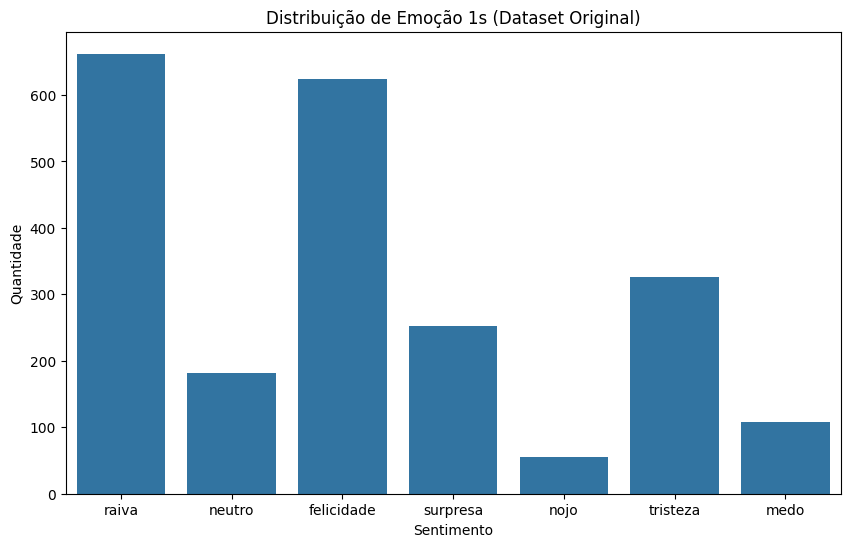

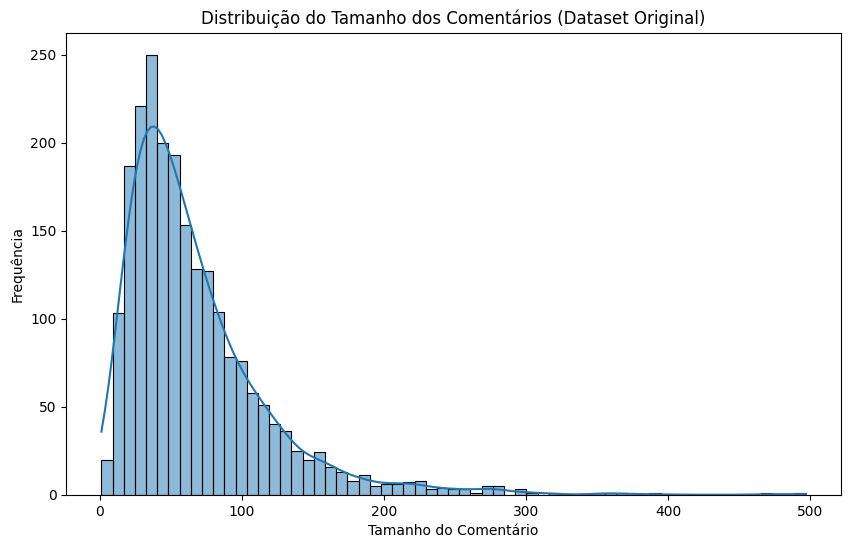

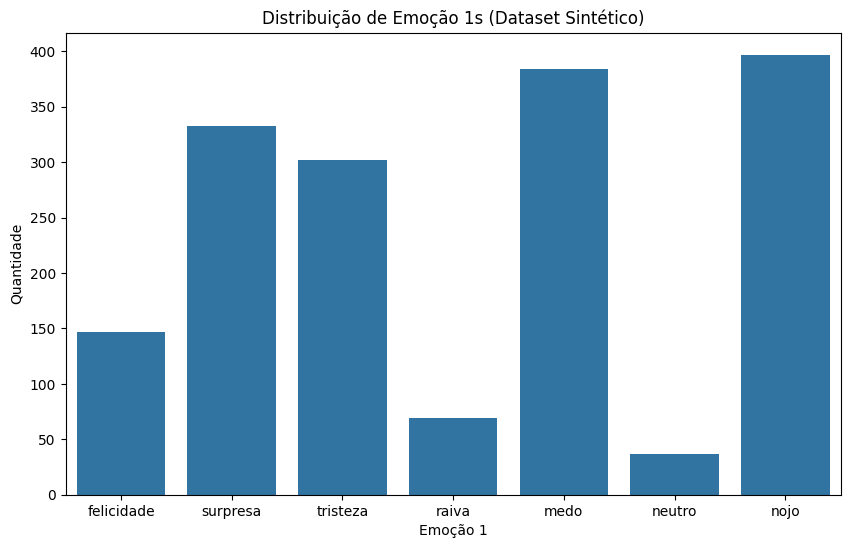

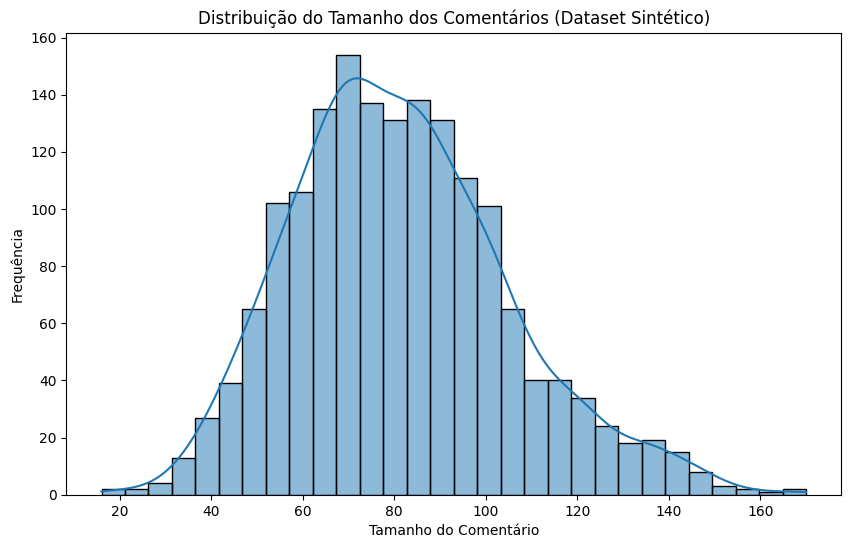

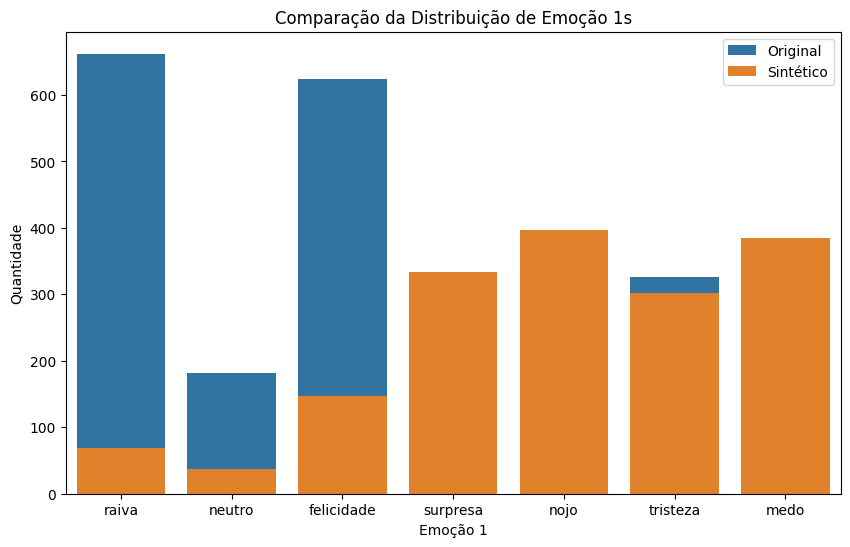

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Emoção 1', data=dataset)
plt.title('Distribuição de Emoção 1s (Dataset Original)')
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')
plt.show()


dataset['Tamanho do Comentário'] = dataset['Comentário'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Tamanho do Comentário'], kde=True)
plt.title('Distribuição do Tamanho dos Comentários (Dataset Original)')
plt.xlabel('Tamanho do Comentário')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Emoção 1', data=dataset_sintetico)
plt.title('Distribuição de Emoção 1s (Dataset Sintético)')
plt.xlabel('Emoção 1')
plt.ylabel('Quantidade')
plt.show()


dataset_sintetico['Tamanho do Comentário'] = dataset_sintetico['Comentário'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(dataset_sintetico['Tamanho do Comentário'], kde=True)
plt.title('Distribuição do Tamanho dos Comentários (Dataset Sintético)')
plt.xlabel('Tamanho do Comentário')
plt.ylabel('Frequência')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Emoção 1', data=dataset, label='Original')
sns.countplot(x='Emoção 1', data=dataset_sintetico, label='Sintético')
plt.title('Comparação da Distribuição de Emoção 1s')
plt.xlabel('Emoção 1')
plt.ylabel('Quantidade')
plt.legend()
plt.show()


### Total de comentários

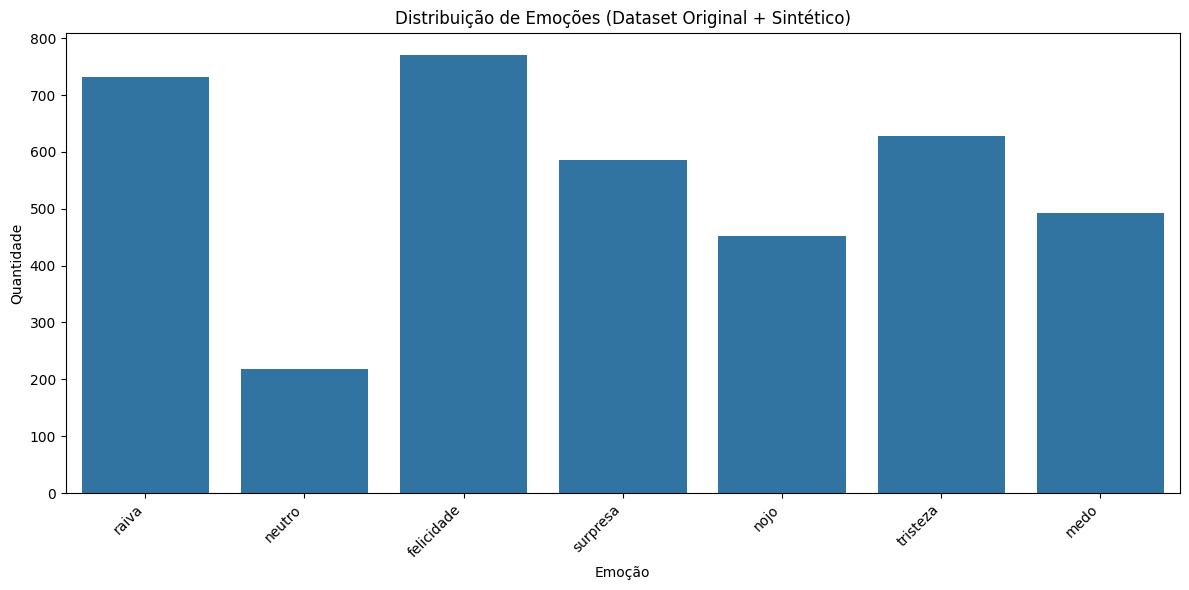

In [ ]:
# Gráfico de colunas da quantidade total de comentários por emoções

combined_dataset = pd.concat([dataset, dataset_sintetico], ignore_index=True)
plt.figure(figsize=(12, 6))
sns.countplot(x='Emoção 1', data=combined_dataset)
plt.title('Distribuição de Emoções (Dataset Original + Sintético)')
plt.xlabel('Emoção')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Nuvem de palavras

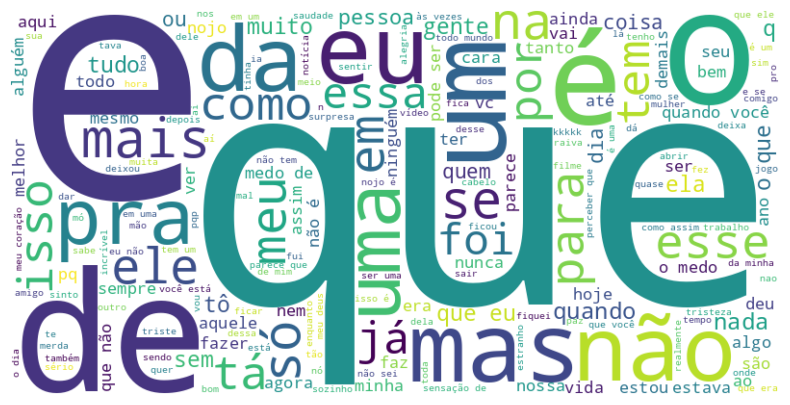

In [ ]:


from wordcloud import WordCloud
import matplotlib.pyplot as plt

def preprocess_text(text):
  text = text.lower()
  return text


combined_dataset = pd.concat([dataset, dataset_sintetico], ignore_index=True)
all_comments = ' '.join(combined_dataset['Comentário'].astype(str).apply(preprocess_text))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Tratamento de dados

### Remoção de stopwords ✅

In [ ]:
words_to_remove = set([
    'a', 'o', 'e', 'de', 'que', 'em', 'para', 'com', 'não', 'uma', 'os', 'as', 'é', 'por', 'se', 'na', 'no', 'dos', 'das',
    'do', 'da', 'eu', 'ele', 'ela', 'eles', 'elas', 'você', 'vocês', 'me', 'te', 'nos', 'eh', 'um', 'ah', 'q', 'isso',
    'aquele', 'aquela', 'assim', 'então', 'muito', 'mais', 'menos', 'sempre', 'nunca', 'talvez', 'algum', 'alguma',
    'todo', 'toda', 'todos', 'todas', 'outro', 'outra', 'outros', 'outras', 'qual', 'quais', 'quem', 'como', 'onde',
    'quando', 'porque', 'mesmo', 'mesma', 'mesmos', 'mesmas', 'só', 'também', 'ainda', 'já', 'agora', 'apenas', 'nem',
    'senão', 'ora', 'aliás', 'enfim', 'contudo', 'todavia', 'portanto', 'logo', 'pois', 'entretanto', 'ademais',
    'outrossim', 'conquanto', 'doravante', 'mormente', 'demais', 'além', 'apesar', 'que', 'essa', 'esse', 'mas', 'tem',
    'pra', 'meu', 'todo', 'ra', 'minha', 'tudo', 'foi', 'ser', 'tá', 'tô', 'cara', 'deu', 'vai', 'vídeo', 'vc', 'deu', 'coisa'
])

# words_to_remove = set([
#     'que', 'de', 'e', 'é', 'o',  'eu', 'um', 'ser', 'em'
# ])

def remove_words_from_dataset(dataset, words_to_remove):
    if 'Comentário' not in dataset.columns:
        raise KeyError("A coluna 'Comentário' não foi encontrada no dataset")

    dataset['Comentário'] = dataset['Comentário'].astype(str).apply(
        lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in words_to_remove])
    )
    return dataset

dataset = remove_words_from_dataset(dataset, words_to_remove)
dataset_sintetico = remove_words_from_dataset(dataset_sintetico, words_to_remove)


### Lematização

In [ ]:
stopwords_br_personalizado = []

def preprocess_text(text):
    """Pré-processa o texto: lematização, remoção de stopwords e pontuação."""
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text.lower() not in stopwords_br_personalizado]
    return " ".join(tokens)

dataset['Comentário'] = dataset['Comentário'].apply(preprocess_text)
dataset_sintetico['Comentário'] = dataset_sintetico['Comentário'].apply(preprocess_text)

KeyboardInterrupt: 

### Substituição de emote por texto ✅

In [ ]:

emoji_substitutions = {
    ":)": " felicidade",
    ":(": " tristeza ",
    ":D": " felicidade",
    ":P": " felicidade",
    ":|": " tristeza ",
    ":O": "surpresa ",
    ";)": " felicidade",
    ":/": " tristeza ",
    ":O": "surpresa ",
    ":*": " felicidade ",
    "XD": " felicidade ",
    ":'(": " tristeza ",
    "🤢": " nojo ",
    "😢": " tristeza ",
    "😍": " felicidade ",
    "😊": " felicidade ",
    "👏🏼": " felicidade ",
    "😃": " felicidade ",
    "🤣": " felicidade ",
    "😂": " felicidade ",
    "😌": " felicidade ",
    "🤭": " felicidade ",
    "👏": " felicidade ",
    "☺️": " felicidade ",
    "👍": " felicidade ",
    "😉": " felicidade ",
    "😅": " felicidade ",
    "😇": " felicidade ",
    "🙂": " felicidade ",
    "😝": " felicidade ",
    "😎": " felicidade ",
    "😁": " felicidade ",
    "😌": " felicidade ",
    "😛": " felicidade ",
    "😮": " surpresa ",
    "😯": " surpresa ",
    "😒": " tristeza ",
    "😓": " tristeza ",
    "😔": " tristeza ",
    "😖": " tristeza ",
    "😤": " raiva ",
    "🥰": " felicidade ",
    "❤️": " felicidade ",
    "🤩": " felicidade ",
    "😭": " tristeza ",
    "😃": " felicidade ",
    "😌": " felicidade ",
    "😒": " tristeza ",
    "😓": " tristeza ",
    "😔": " tristeza ",
    "😖": " tristeza ",
    "😤": " raiva ",
    "😢": " tristeza ",
    "😭": " tristeza ",
    "😞": " tristeza ",
    "😠": " raiva ",
    "😡": " raiva ",
    "🤬": " raiva ",
    "😤": " raiva ",
    "😨": " medo ",
    "😰": " medo ",
    "😨": " medo ",
    "😱": " medo ",
    "🤮": " nojo ",
    "🤢": " nojo ",
    "🙄": " raiva",
    "🥳": " felicidade ",
    "🥺": " tristeza ",
    "😩": " tristeza ",
    "😫": " tristeza ",
    "😥": " tristeza ",
    "😲": " surpresa ",
    "😄": " felicidade ",
    "🤦‍♂️": " raiva "


}

def replace_emojis(text):
    for emoji, word in emoji_substitutions.items():
        text = text.replace(emoji, word)
    return text

dataset['Comentário'] = dataset['Comentário'].apply(replace_emojis)
dataset_sintetico['Comentário'] = dataset_sintetico['Comentário'].apply(replace_emojis)



### Atribuição de sinonimos

In [ ]:
import re

sins_substitutions = {

    # Felicidade
    "alegre": "felicidade",
    "contente": "felicidade",
    "animado": "felicidade",
    "feliz": "felicidade",
    "felizinho": "felicidade",
    "felizinha": "felicidade",
    "divertido": "felicidade",
    "radiante": "felicidade",
    "eufórico": "felicidade",
    "empolgado": "felicidade",
    "sorridente": "felicidade",
    "satisfeito": "felicidade",
    "realizado": "felicidade",
    "exultante": "felicidade",
    "extasiado": "felicidade",
    "maravilhado": "felicidade",
    "grato": "felicidade",
    "agradecido": "felicidade",

    # Tristeza
    "infeliz": "tristeza",
    "triste": "tristeza",
    "melancólico": "tristeza",
    "bad": "tristeza",
    "sad": "tristeza",
    "depre": "tristeza",
    "depresivo": "tristeza",
    "depress": "tristeza",
    "desanimado": "tristeza",
    "abatido": "tristeza",
    "choroso": "tristeza",
    "magoado": "tristeza",
    "desesperado": "tristeza",
    "aflito": "tristeza",
    "amargurado": "tristeza",
    "solitário": "tristeza",
    "angustiado": "tristeza",
    "desolado": "tristeza",
    "tristezaza": "tristeza",

    # Raiva
    "furioso": "raiva",
    "estressado": "raiva",
    "ódio": "raiva",
    "vtmnc": "raiva",
    "fdp": "raiva",
    "vsf": "raiva",
    "vtnc": "raiva",
    "pistola": "raiva",
    "irritado": "raiva",
    "bravo": "raiva",
    "enfurecido": "raiva",
    "inconformado": "raiva",
    "ressentido": "raiva",
    "frustrado": "raiva",
    "furibundo": "raiva",
    "exasperado": "raiva",
    "rancoroso": "raiva",
    "indignado": "raiva",
    "pqp": "raiva",

    # Medo
    "assustado": "medo",
    "apavorado": "medo",
    "aterrorizado": "medo",
    "nervoso": "medo",
    "receoso": "medo",
    "amedrontado": "medo",
    "temeroso": "medo",
    "ansioso": "medo",
    "tenso": "medo",
    "preocupado": "medo",
    "inseguro": "medo",

    # Nojo
    "nojento": "nojo",
    "enojado": "nojo",
    "repulsivo": "nojo",
    "desgostoso": "nojo",
    " asco ": "nojo",
    "revoltado": "nojo",
    "indignado": "nojo",

    # Surpresa
    "surpreso": "surpresa",
    "chocado": "surpresa",
    "perplexo": "surpresa",
    "atônito": "surpresa",
    "boquiaberto": "surpresa",
    "espantado": "surpresa",

}

def replace_sin(text):
    for sins, word in sins_substitutions.items():

        text = re.sub(rf'\b{re.escape(sins)}\b', rf'{sins} {word}', text)
    return text

dataset['Comentário'] = dataset['Comentário'].apply(replace_sin)
dataset_sintetico['Comentário'] = dataset_sintetico['Comentário'].apply(replace_sin)


### Anomatopeias

In [ ]:
import re

def replace_laughter_with_felicidade(text):

    patterns = [
        r'\b[kK]{2,}\b',        # kkk, KKKK, etc (mínimo de 2 'k')
        r'\b[hH][aA]{1,}\b',    # ha, haha, HAHAHA, etc (mínimo de 1 'a' após 'h')
        r'\b[rR][sS]{1,}\b',    # rs, rsrs, RSRSRS, etc (mínimo de 1 's' após 'r')
        r'\b[kK][aA]{1,}\b'     # ka, kaka, KAKA, etc (mínimo de 1 'a' após 'k')
    ]

    # Substitui cada padrão por "felicidade"
    for pattern in patterns:
        text = re.sub(pattern, 'felicidade', text)

    # Remove espaços extras que podem surgir
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# Classificador de Emoções


## Setup


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset['Comentário'].fillna('')
y = dataset['Emoção 1']

X_train_orig, X_test, y_train_orig, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_sint = dataset_sintetico['Comentário'].fillna('')
y_sint = dataset_sintetico['Emoção 1']

# Remover o comentário para classificação do dataset natural + sintético
# X_train = pd.concat([X_train_orig, X_sint], ignore_index=True)
# y_train = pd.concat([y_train_orig, y_sint], ignore_index=True)

# Remover o comentário para classificação do dataset natural apenas
# X_train = pd.concat([X_train_orig], ignore_index=True)
# y_train = pd.concat([y_train_orig], ignore_index=True)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## SVM

In [ ]:
svm_model = SVC(kernel='linear', degree = 10)
svm_model.fit(X_train_vec, y_train)


y_pred = svm_model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print("melhor acurácia histórica: 0.6639511201629328")
print(f"Acurácia: {accuracy}")
print("remoção de emojis: [o]")
print("remoção de stopwords: [o]")
print("lematização: [o]")
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

melhor acurácia histórica: 0.6639511201629328
Acurácia: 0.5615763546798029
remoção de emojis: [o]
remoção de stopwords: [o]
lematização: [o]



Relatório de Classificação:
              precision    recall  f1-score   support

  felicidade       0.64      0.60      0.62       197
        medo       0.58      0.22      0.32        32
        nojo       1.00      0.18      0.31        11
       raiva       0.47      0.78      0.59       191
    surpresa       0.59      0.35      0.44        75
    tristeza       0.76      0.38      0.51       103

    accuracy                           0.56       609
   macro avg       0.68      0.42      0.46       609
weighted avg       0.61      0.56      0.55       609


Matriz de Confusão:
[[119   0   0  67   5   6]
 [  6   7   0  13   6   0]
 [  1   0   2   7   1   0]
 [ 32   2   0 149   3   5]
 [ 10   2   0  36  26   1]
 [ 18   1   0  42   3  39]]


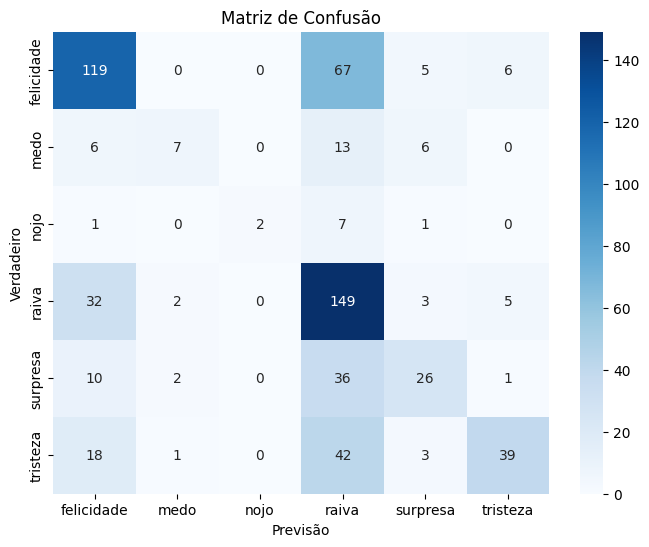

In [ ]:
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

svm_model = SVC(kernel='linear', random_state=42)


kf = KFold(n_splits=5, shuffle=True, random_state=42) # É possível trocar o n_splites para uma validação cruzada de grau superior
scores = cross_val_score(svm_model, X_train_vec, y_train, cv=kf)


print("Scores de cada fold:", scores)
print("Acurácia média da validação cruzada:", scores.mean())
print("Desvio padrão da acurácia:", scores.std())

svm_model.fit(X_train_vec, y_train)

Scores de cada fold: [0.56529851 0.62873134 0.60820896 0.63059701 0.6       ]
Acurácia média da validação cruzada: 0.6065671641791045
Desvio padrão da acurácia: 0.02373861711486526


SVC(kernel='linear', random_state=42)

## Perceptron Multilayer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Separar os dados originais
X_orig = dataset['Comentário'].fillna('')
y_orig = dataset['Emoção 1']

# Divisão em treino e teste (usando o dataset original)
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.3, random_state=42)

# --- 2. Aumento de Dados (Data Augmentation) ---
# Adiciona os dados sintéticos APENAS ao conjunto de treino

X_sint = dataset_sintetico['Comentário'].fillna('')
y_sint = dataset_sintetico['Emoção 1']

# Concatena os dados de treino originais com os dados sintéticos
# X_train = pd.concat([X_train, X_sint], ignore_index=True)
# y_train = pd.concat([y_train, y_sint], ignore_index=True)

X_train = pd.concat([X_train], ignore_index=True)
y_train = pd.concat([y_train], ignore_index=True)

print(f"Tamanho do treino após aumento: {len(X_train)} amostras")
print(f"Tamanho do teste: {len(X_test)} amostras")

# --- 3. Vetorização com TF-IDF ---
# O vetorizador é treinado com o conjunto de treino aumentado
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test) # O mesmo vetorizador transforma o teste

# Converter matrizes esparsas para densas para compatibilidade com Keras
X_train_dense = X_train_vec.toarray()
X_test_dense = X_test_vec.toarray()

# --- 4. Codificação das Classes (Labels) ---
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# --- 5. Construção do Modelo de Rede Neural ---
model = Sequential([
    Dense(128, activation='gelu', input_shape=(X_train_dense.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='gelu'),
    Dropout(0.3),
    Dense(len(encoder.classes_), activation='softmax')
])

# --- 6. Compilação e Treinamento ---
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinamento com os dados de treino (aumentados e vetorizados)
model.fit(X_train_dense, y_train_encoded, epochs=10, batch_size=32, verbose=1)

# --- 7. Avaliação do Modelo ---
print("\n--- Avaliando o modelo no conjunto de teste ---")
loss, acc = model.evaluate(X_test_dense, y_test_encoded, verbose=0)
print(f"Acurácia final: {acc*100:.2f}%")

Tamanho do treino após aumento: 1418 amostras
Tamanho do teste: 609 amostras
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3243 - loss: 1.7473
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3254 - loss: 1.5358
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3906 - loss: 1.3885
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6442 - loss: 1.1289
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8276 - loss: 0.7371
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8819 - loss: 0.4572
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9363 - loss: 0.2747
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9591 - loss: 0.1833
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9797 - loss: 0.1396
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9871 - loss: 0.0949

--- Avaliando o modelo no conjunto de teste ---
Acurácia final: 48.77%


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Gerando Matriz de Confusão...


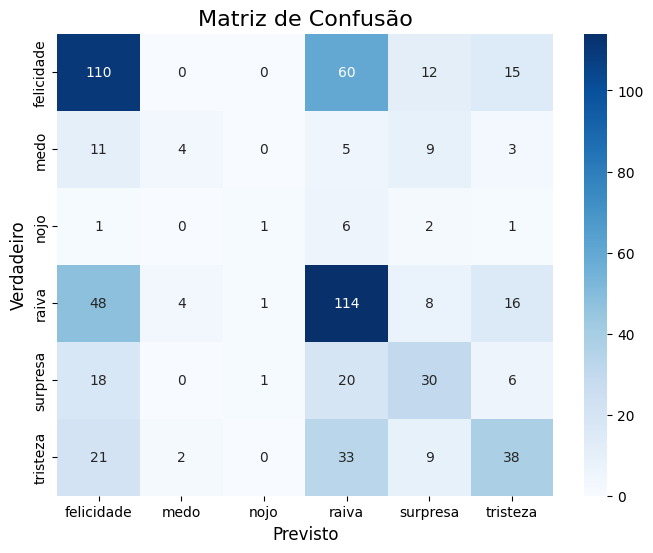


Gerando Gráfico de Métricas de Performance...


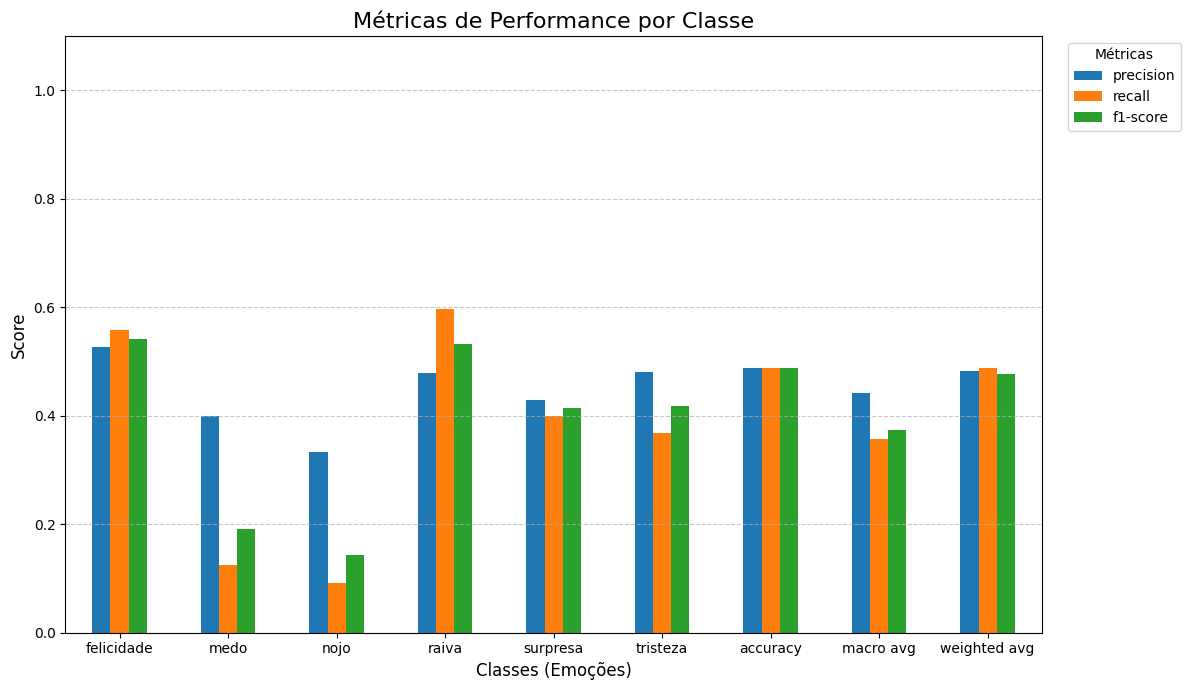


--- Relatório de Classificação Detalhado ---
              precision    recall  f1-score   support

  felicidade       0.53      0.56      0.54       197
        medo       0.40      0.12      0.19        32
        nojo       0.33      0.09      0.14        11
       raiva       0.48      0.60      0.53       191
    surpresa       0.43      0.40      0.41        75
    tristeza       0.48      0.37      0.42       103

    accuracy                           0.49       609
   macro avg       0.44      0.36      0.37       609
weighted avg       0.48      0.49      0.48       609



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

class_names = encoder.classes_
y_pred_probs = model.predict(X_test_dense)
y_pred = np.argmax(y_pred_probs, axis=1)

# a) Matriz de Confusão
print("\nGerando Matriz de Confusão...")
cm = confusion_matrix(y_test_encoded, y_pred, labels=np.arange(len(class_names)))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xlabel('Previsto', fontsize=12)
plt.show()

# b) Relatório de Classificação e Gráfico de Métricas
print("\nGerando Gráfico de Métricas de Performance...")
report = classification_report(y_test_encoded, y_pred, target_names=class_names, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report).T

# Preparar dados para o gráfico (sem as médias)
plot_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg', 'support'], errors='ignore', axis=1)
# Garante que todas as classes estejam no df, mesmo se não tiveram predições
for cls in class_names:
    if cls not in plot_df.index:
        plot_df.loc[cls] = [0, 0, 0]

# Plotar o gráfico de barras
plot_df.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Métricas de Performance por Classe', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Classes (Emoções)', fontsize=12)
plt.legend(title='Métricas', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Exibir o relatório de texto completo
print("\n--- Relatório de Classificação Detalhado ---")
print(classification_report(y_test_encoded, y_pred, target_names=class_names, zero_division=0))